In [1]:
import pandas as pd

## Loading the Data

In [3]:
fake_df=pd.read_json('fakeAccountData.json')
real_df=pd.read_json('realAccountData.json')

In [4]:
(fake_df)
(real_df)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0
...,...,...,...,...,...,...,...,...,...
989,239,1134,145,9,1,0,0,19,0
990,91,149,0,7,1,0,0,18,0
991,78,783,28,1,1,0,0,11,0
992,135,517,44,4,1,0,4,11,0


In [5]:
print(fake_df['isFake'].value_counts())
print(real_df['isFake'].value_counts())

isFake
1    200
Name: count, dtype: int64
isFake
0    994
Name: count, dtype: int64


In [6]:
real_df.shape

(994, 9)

In [7]:
fake_df.shape

(200, 9)

In [8]:
final_df=pd.concat([real_df,fake_df],ignore_index=True)

### The data is not balanced, this is something we will take into consideration later on in this notebook 

In [9]:
final_df

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0
...,...,...,...,...,...,...,...,...,...
1189,0,25,138,6,1,0,0,10,1
1190,0,0,52,6,1,0,3,7,1
1191,0,1,92,9,1,0,1,15,1
1192,1,0,60,5,1,0,1,13,1


<Axes: >

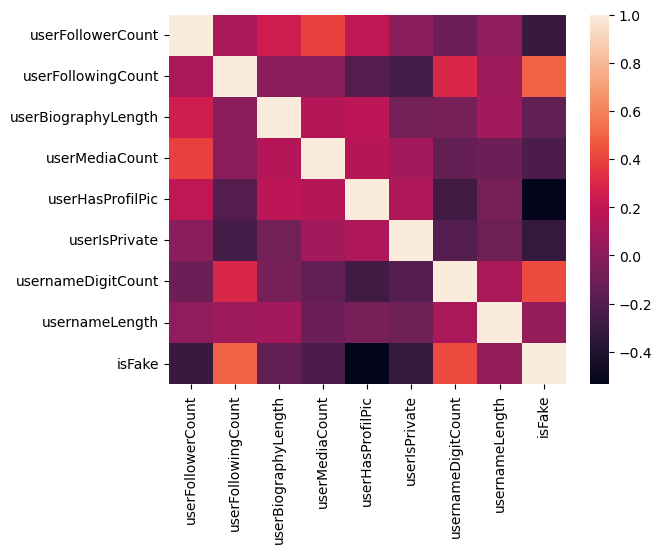

In [10]:
import seaborn as sns
sns.heatmap(final_df.corr())

## All the features have either positive or negative correlation with the `isFake` label

# 1) Models As Is

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
X=final_df.drop('isFake',axis=1)
y=final_df['isFake']

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(123)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)
y_train.value_counts()

isFake
0    745
1    150
Name: count, dtype: int64

## a) RandomForestRegressor

In [14]:
rf=RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(rf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       253
           1       0.82      0.89      0.85        46

    accuracy                           0.95       299
   macro avg       0.90      0.93      0.91       299
weighted avg       0.96      0.95      0.95       299



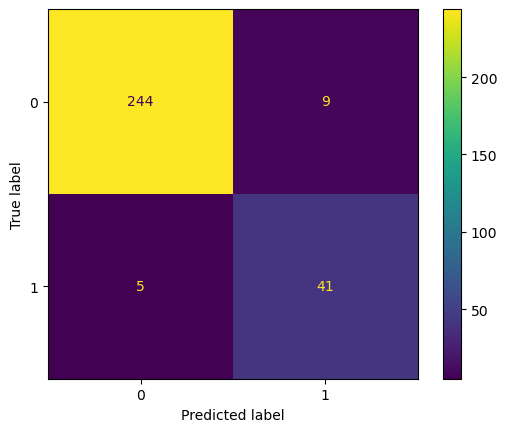

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(rf.predict(X_test),y_test)).plot()

## b) KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
print(classification_report(knn.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       253
           1       0.80      0.87      0.83        46

    accuracy                           0.95       299
   macro avg       0.89      0.92      0.90       299
weighted avg       0.95      0.95      0.95       299



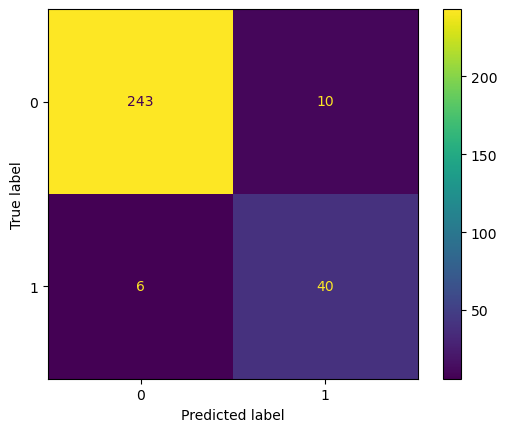

In [54]:
ConfusionMatrixDisplay(confusion_matrix(knn.predict(X_test),y_test)).plot()

### As raw data with no scaling balancing and other transformations the RandomForrestClassifier did well, we reached f1 scores of 97% and 85% for the Real and Fake class respectively


### As for the Knn with 2 neighbors it gave us 97% and 83% f1 scores 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2) Balancing the Data

## a) Upsampling the Data

In [57]:
#Up sample the minority class:

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import numpy as np

fake_df_upsampled = resample(fake_df, 
                            replace=True,     # sample with replacement
                            n_samples=994,    # to match majority class
                            random_state=123)

final_df_upsampled = pd.concat([fake_df_upsampled, real_df]) #create the complete df after upsampling

#display the number of samples of each class
print(fake_df_upsampled.shape)
print(real_df.shape)


np.random.seed(123)

X_upsampled=final_df_upsampled.drop('isFake',axis=1)
y_upsampled=final_df_upsampled['isFake']

X_train_upsampled,X_test_upsampled,y_train_upsampled,y_test_upsampled=train_test_split(X_upsampled,y_upsampled,stratify=y_upsampled)
y_train_upsampled.value_counts()

(994, 9)
(994, 9)


isFake
1    746
0    745
Name: count, dtype: int64

In [58]:
rf.fit(X_train_upsampled,y_train_upsampled)
print(classification_report(rf.predict(X_test_upsampled),y_test_upsampled))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       245
           1       1.00      0.98      0.99       252

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



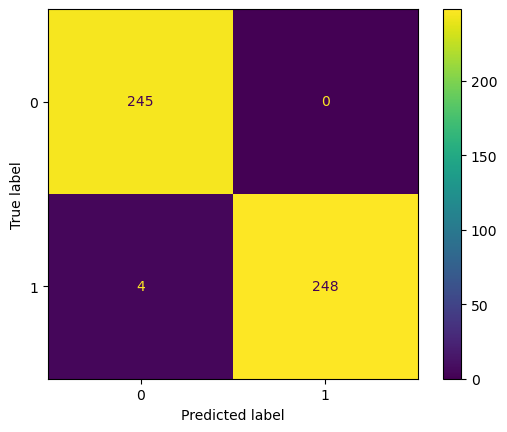

In [59]:
ConfusionMatrixDisplay(confusion_matrix(rf.predict(X_test_upsampled),y_test_upsampled)).plot()

### The results seem sketchy since we already had little data in the first place, so upscaling especially on the RandomForestClassifier could cause a logical error while training, hence we'll try other methods

In [60]:
knn.fit(X_train_upsampled,y_train_upsampled)
print(classification_report(knn.predict(X_test_upsampled),y_test_upsampled))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       1.00      0.96      0.98       258

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



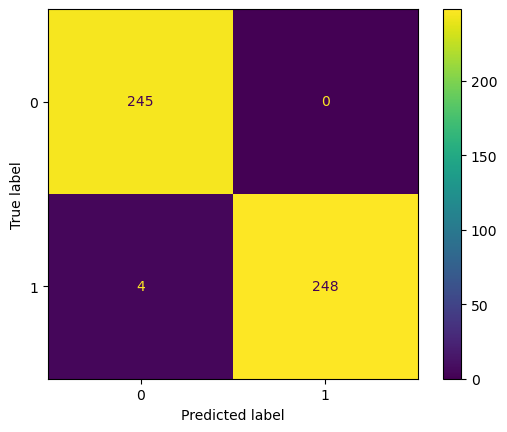

In [61]:
ConfusionMatrixDisplay(confusion_matrix(rf.predict(X_test_upsampled),y_test_upsampled)).plot()

## Knn also seems sketchy because when repeating the data some data copies might leak into the testing data allowing for having a distance of 0 and predicting the same point (especially with low number of neighbors)

### Hence Upscaling is not going to be used

## b) Downsampling the data

In [62]:
#downsampling the majority class:
from sklearn.model_selection import train_test_split
import numpy as np

samples_to_drop = 994 - 200

# Shuffle the negative samples randomly
real_df = real_df.sample(frac=1, random_state=123)
    
# Drop the excess samples from the shuffled negative samples
real_df_downsampled = real_df.iloc[samples_to_drop:]

fake_df_downsampled = fake_df

final_df_downsampled=pd.concat([real_df_downsampled,fake_df_downsampled],ignore_index=True)

X_downsampled=final_df_downsampled.drop('isFake',axis=1)
y_downsampled=final_df_downsampled['isFake']


#display the number of samples of each class
print(fake_df_downsampled.shape)
print(real_df_downsampled.shape)


np.random.seed(123)

X_train_downsampled,X_test_downsampled,y_train_downsampled,y_test_downsampled=train_test_split(X_downsampled,y_downsampled,stratify=y_downsampled)
y_train_downsampled.value_counts()

(200, 9)
(200, 9)


isFake
0    150
1    150
Name: count, dtype: int64

### RandomForestClassification on the DownSampled Data

In [63]:
rf.fit(X_train_downsampled,y_train_downsampled)
print(classification_report(rf.predict(X_test_downsampled),y_test_downsampled))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



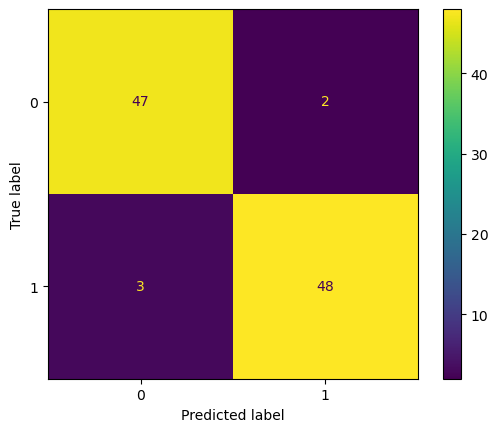

In [64]:
ConfusionMatrixDisplay(confusion_matrix(rf.predict(X_test_downsampled),y_test_downsampled)).plot()

### Knn on the downsampled Data

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.94      0.96      0.95        49

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



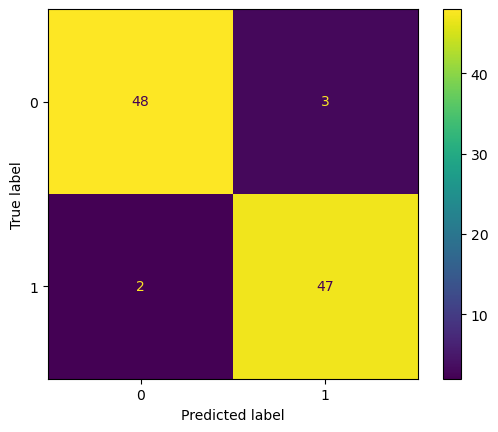

In [66]:
knn.fit(X_train_downsampled,y_train_downsampled)
print(classification_report(knn.predict(X_test_downsampled),y_test_downsampled))
ConfusionMatrixDisplay(confusion_matrix(knn.predict(X_test_downsampled),y_test_downsampled)).plot()

### These Results are promising and are more reliable than upsampling the data Since no data is being repeated (from 200 to 900 due to upscaling)

# 3)Scaling the Data

### RF

In [68]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       252
           1       0.86      0.91      0.89        47

    accuracy                           0.96       299
   macro avg       0.92      0.94      0.93       299
weighted avg       0.96      0.96      0.96       299



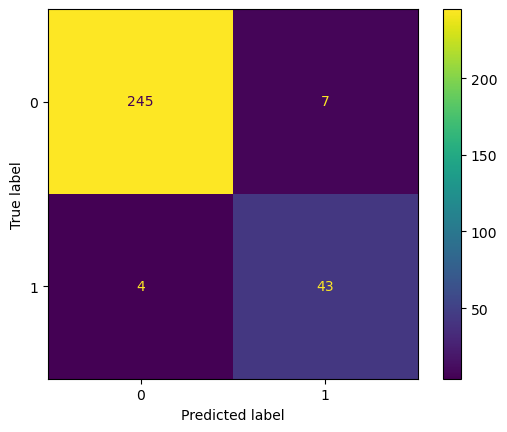

In [71]:
rf.fit(X_train_scaled,y_train)
print(classification_report(rf.predict(X_test_scaled),y_test))

ConfusionMatrixDisplay(confusion_matrix(rf.predict(X_test_scaled),y_test)).plot()

### KNN

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       264
           1       0.60      0.86      0.71        35

    accuracy                           0.92       299
   macro avg       0.79      0.89      0.83       299
weighted avg       0.94      0.92      0.92       299



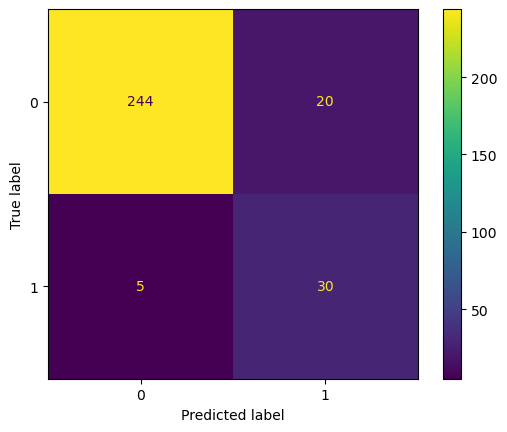

In [74]:
knn.fit(X_train_scaled,y_train)
print(classification_report(knn.predict(X_test_scaled),y_test))

ConfusionMatrixDisplay(confusion_matrix(knn.predict(X_test_scaled),y_test)).plot()

## may be due to the low # of K's lets increase it and test

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       260
           1       0.66      0.85      0.74        39

    accuracy                           0.92       299
   macro avg       0.82      0.89      0.85       299
weighted avg       0.93      0.92      0.93       299



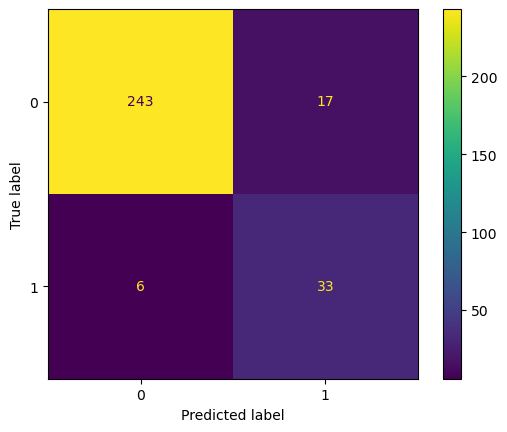

In [184]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled,y_train)
print(classification_report(knn.predict(X_test_scaled),y_test))

ConfusionMatrixDisplay(confusion_matrix(knn.predict(X_test_scaled),y_test)).plot()

### Expected since scaled data gives similar scaling to all the features allowing for the distance calculated to change with respect to the unscaled data

### changing the number of K's had no significant impact on the results

### Random Forest performed better on the scaled data however, KNN performed worse

# 3) Finding Accuracy, F1 Score and  precision for Manhattan and Euclidian distance calculation with different Balancing Methods

## a) Manhattan Distance Calculation

### Unbalanced Data

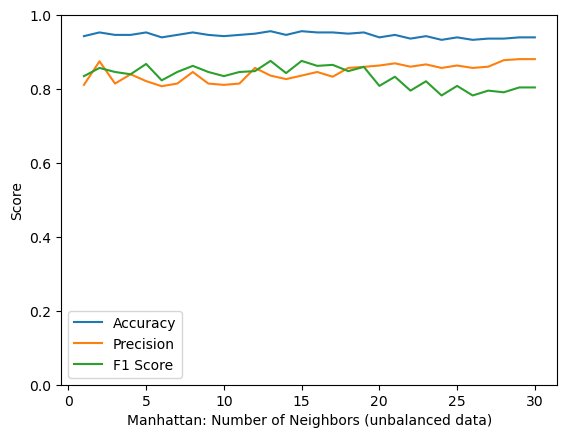

With the Manhattan distance method the best parameter (k): {'n_neighbors': 2}
With the Manhattan distance method the best cross-validation accuracy: 0.9552933832709112
With the Manhattan distance method the best f1_score: 0.8571428571428572
Scores with balance weight:


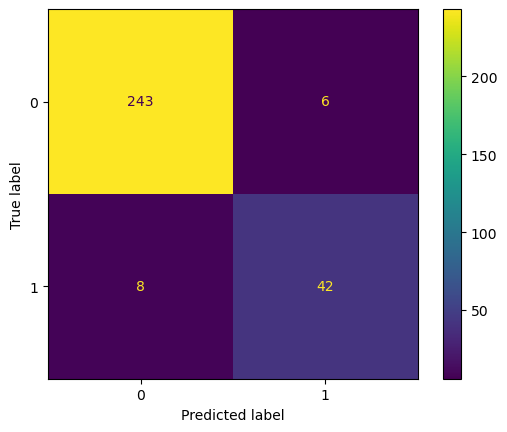

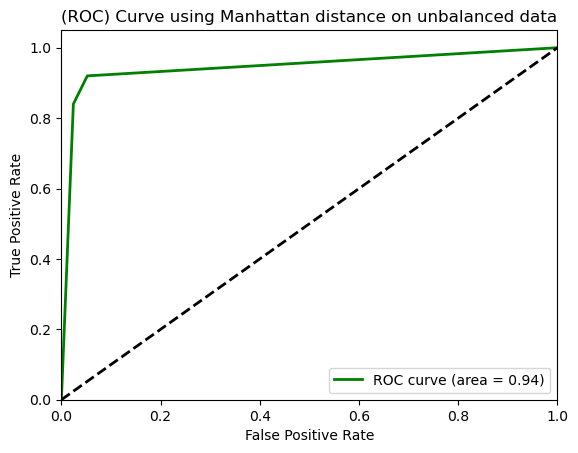

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

accuracies = []
precisions = []
f1_scores = []


for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'manhattan')

    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
# Setting y-axis limits
plt.ylim(0, 1)
plt.xlabel('Manhattan: Number of Neighbors (unbalanced data)')
plt.ylabel('Score')
plt.legend()
plt.show()


param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'manhattan')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter and the corresponding accuracy
print("With the Manhattan distance method the best parameter (k):", grid_search.best_params_)
print("With the Manhattan distance method the best cross-validation accuracy:", grid_search.best_score_)


manhattan_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='manhattan')
manhattan_best_knn.fit(X_train, y_train)

y_pred = manhattan_best_knn.predict(X_test)

print("With the Manhattan distance method the best f1_score:", f1_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

print('Scores with balance weight:')


# Predict the probabilities for positive class
y_prob = manhattan_best_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve using Manhattan distance on unbalanced data')
plt.legend(loc="lower right")
plt.show()

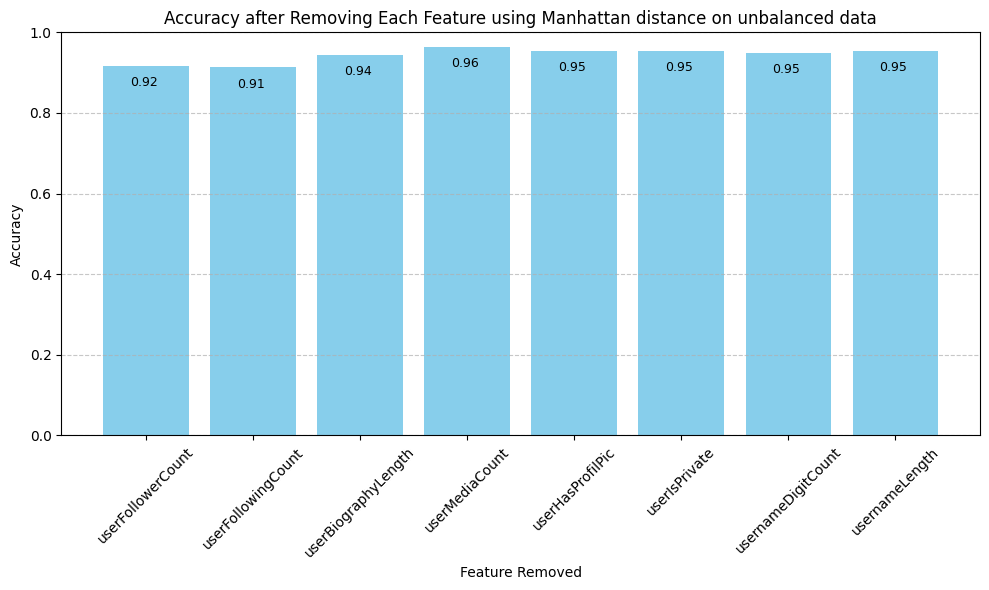

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

features = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 
            'userMediaCount', 'userHasProfilPic', 'userIsPrivate', 
            'usernameDigitCount', 'usernameLength']

target = 'isFake'

accuracies = []

for feature_to_remove in features:
    # Remove the feature from the dataframe
    X = final_df.drop(columns=[feature_to_remove])
    y = final_df[target]
    

    np.random.seed(123)

    X_train_WithDrop,X_test_WithDrop,y_train_WithDrop,y_test_WithDrop = train_test_split(X,y,stratify=y)
    
    param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

    knn = KNeighborsClassifier(metric = 'manhattan')

    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train_WithDrop, y_train_WithDrop)
    
    
    manhattan_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='manhattan')
    manhattan_best_knn.fit(X_train_WithDrop, y_train_WithDrop)

    y_pred_WithDrop = manhattan_best_knn.predict(X_test_WithDrop)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_WithDrop, y_pred_WithDrop)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(features, accuracies, color='skyblue')

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', fontsize=9, color='black')
    
plt.xlabel('Feature Removed')
plt.ylabel('Accuracy')
plt.title('Accuracy after Removing Each Feature using Manhattan distance on unbalanced data')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
    

### Upsampled Data

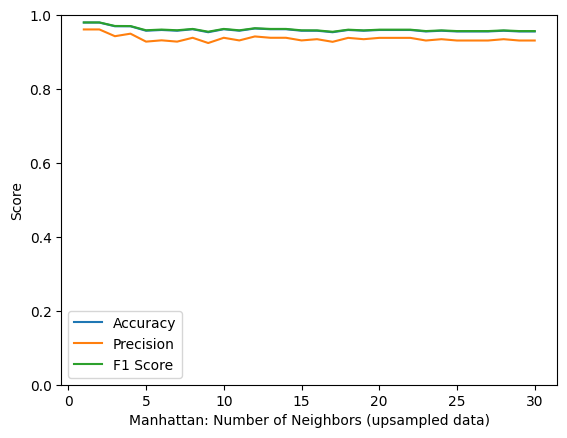

With the Manhattan distance method the best parameter (k): {'n_neighbors': 1}
With the Manhattan distance method the best cross-validation accuracy: 0.9725011185682328
With the Manhattan distance method the best f1_score: 0.9802371541501977
Scores with balance weight:


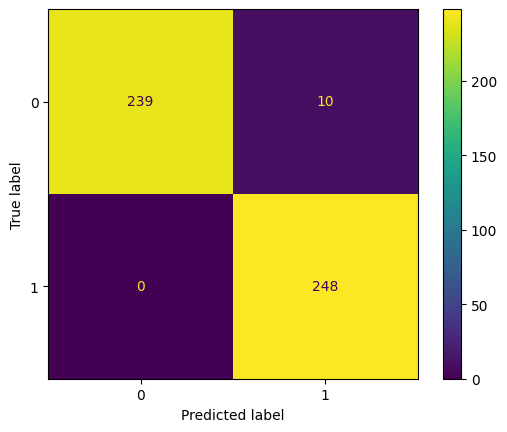

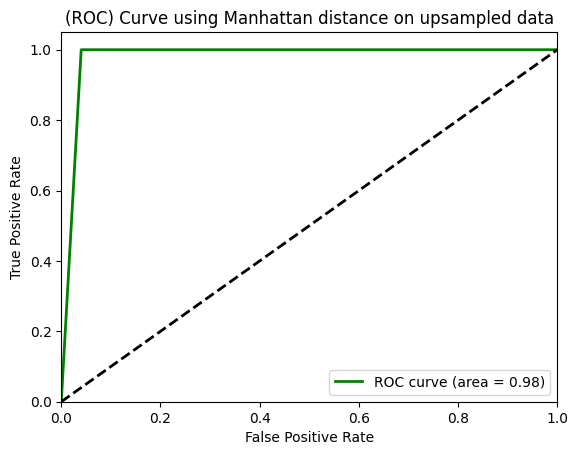

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

accuracies = []
precisions = []
f1_scores = []


for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'manhattan')

    knn.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred_upsampled = knn.predict(X_test_upsampled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_upsampled, y_pred_upsampled)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test_upsampled, y_pred_upsampled)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test_upsampled, y_pred_upsampled)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
# Setting y-axis limits
plt.ylim(0, 1)
plt.xlabel('Manhattan: Number of Neighbors (upsampled data)')
plt.ylabel('Score')
plt.legend()
plt.show()


param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'manhattan')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_upsampled, y_train_upsampled)

# Print the best parameter and the corresponding accuracy
print("With the Manhattan distance method the best parameter (k):", grid_search.best_params_)
print("With the Manhattan distance method the best cross-validation accuracy:", grid_search.best_score_)


manhattan_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='manhattan')
manhattan_best_knn.fit(X_train_upsampled, y_train_upsampled)

y_pred_upsampled = manhattan_best_knn.predict(X_test_upsampled)

print("With the Manhattan distance method the best f1_score:", f1_score(y_test_upsampled, y_pred_upsampled))

ConfusionMatrixDisplay(confusion_matrix(y_test_upsampled, y_pred_upsampled)).plot()

print('Scores with balance weight:')


# Predict the probabilities for positive class
y_prob = manhattan_best_knn.predict_proba(X_test_upsampled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_upsampled, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve using Manhattan distance on upsampled data')
plt.legend(loc="lower right")
plt.show()

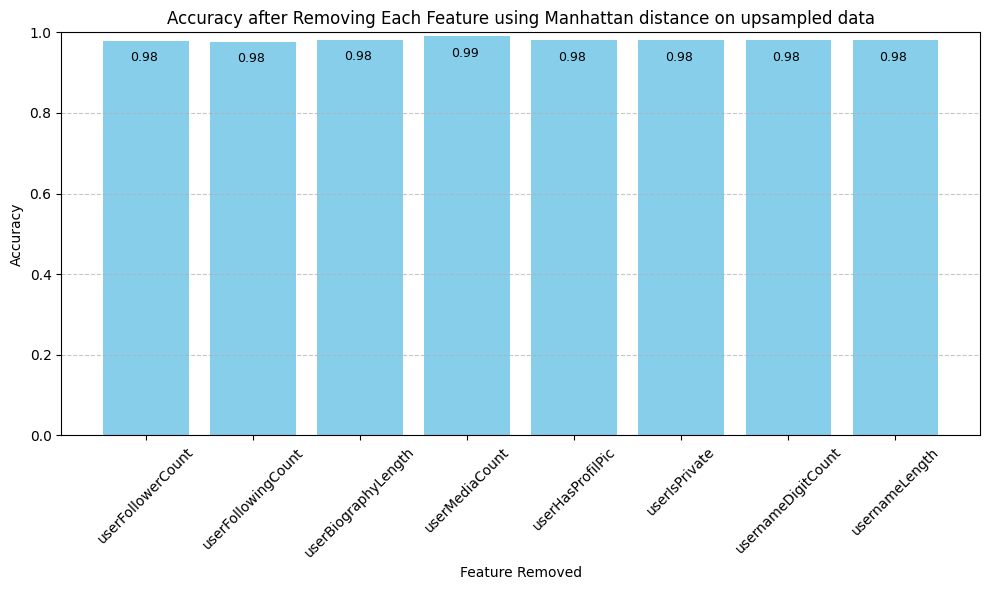

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

features = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 
            'userMediaCount', 'userHasProfilPic', 'userIsPrivate', 
            'usernameDigitCount', 'usernameLength']

target = 'isFake'

accuracies = []

for feature_to_remove in features:
    # Remove the feature from the dataframe
    X_upsampled = final_df_upsampled.drop(columns=[feature_to_remove])
    y_upsampled = final_df_upsampled[target]
    

    np.random.seed(123)

    X_train_WithDrop,X_test_WithDrop,y_train_WithDrop,y_test_WithDrop = train_test_split(X_upsampled,y_upsampled,stratify=y_upsampled)
    
    param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

    knn = KNeighborsClassifier(metric = 'manhattan')

    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train_WithDrop, y_train_WithDrop)
    
    
    manhattan_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='manhattan')
    manhattan_best_knn.fit(X_train_WithDrop, y_train_WithDrop)

    y_pred_WithDrop = manhattan_best_knn.predict(X_test_WithDrop)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_WithDrop, y_pred_WithDrop)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(features, accuracies, color='skyblue')

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', fontsize=9, color='black')
    
plt.xlabel('Feature Removed')
plt.ylabel('Accuracy')
plt.title('Accuracy after Removing Each Feature using Manhattan distance on upsampled data')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Downsampled Data

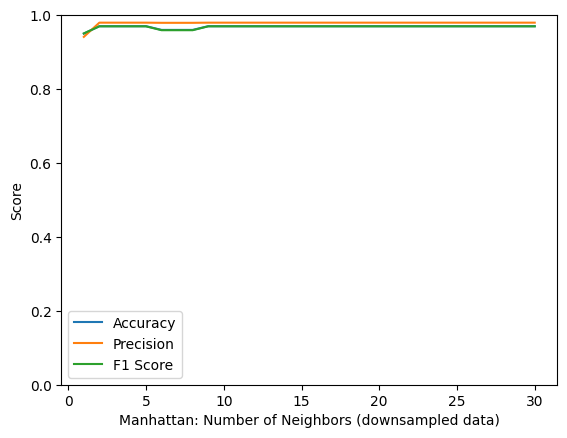

With the Manhattan distance method the best parameter (k): {'n_neighbors': 3}
With the Manhattan distance method the best cross-validation accuracy: 0.9466666666666667
With the Manhattan distance method the best f1_score: 0.9696969696969697
Scores with balance weight:


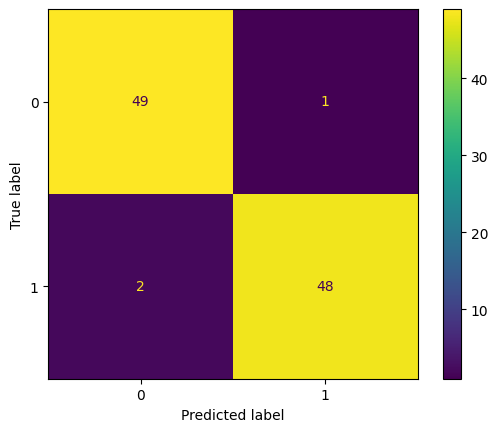

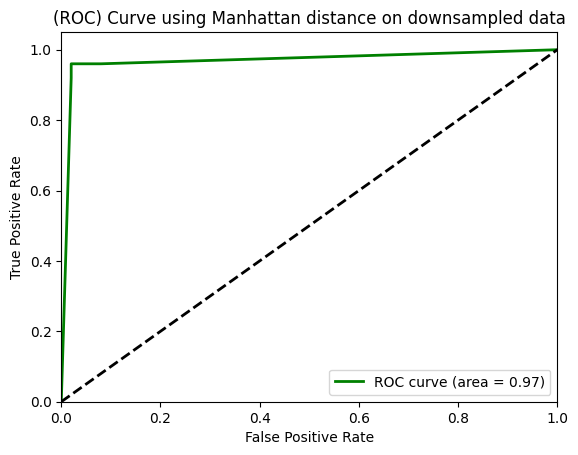

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

accuracies = []
precisions = []
f1_scores = []


for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'manhattan')

    knn.fit(X_train_downsampled, y_train_downsampled)
    
    # Make predictions
    y_pred_downsampled = knn.predict(X_test_downsampled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_downsampled, y_pred_downsampled)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test_downsampled, y_pred_downsampled)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test_downsampled, y_pred_downsampled)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
# Setting y-axis limits
plt.ylim(0, 1)
plt.xlabel('Manhattan: Number of Neighbors (downsampled data)')
plt.ylabel('Score')
plt.legend()
plt.show()


param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'manhattan')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_downsampled, y_train_downsampled)

# Print the best parameter and the corresponding accuracy
print("With the Manhattan distance method the best parameter (k):", grid_search.best_params_)
print("With the Manhattan distance method the best cross-validation accuracy:", grid_search.best_score_)


manhattan_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='manhattan')
manhattan_best_knn.fit(X_train_downsampled, y_train_downsampled)

y_pred_downsampled = manhattan_best_knn.predict(X_test_downsampled)

print("With the Manhattan distance method the best f1_score:", f1_score(y_test_downsampled, y_pred_downsampled))

ConfusionMatrixDisplay(confusion_matrix(y_test_downsampled, y_pred_downsampled)).plot()

print('Scores with balance weight:')


# Predict the probabilities for positive class
y_prob = manhattan_best_knn.predict_proba(X_test_downsampled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_downsampled, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve using Manhattan distance on downsampled data')
plt.legend(loc="lower right")
plt.show()

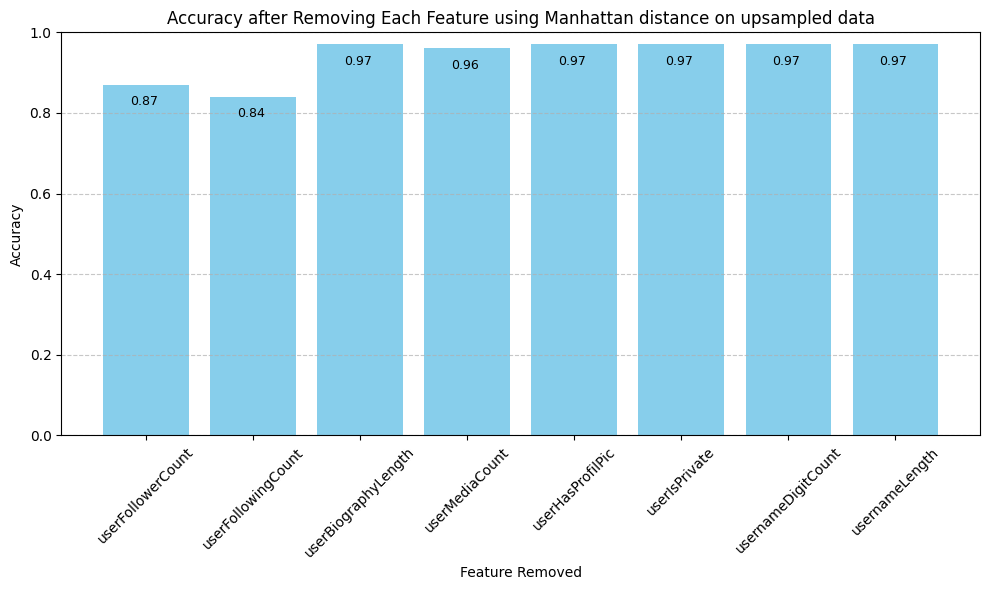

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

features = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 
            'userMediaCount', 'userHasProfilPic', 'userIsPrivate', 
            'usernameDigitCount', 'usernameLength']

target = 'isFake'

accuracies = []

for feature_to_remove in features:
    # Remove the feature from the dataframe
    X_downsampled = final_df_downsampled.drop(columns=[feature_to_remove])
    y_downsampled = final_df_downsampled[target]
    

    np.random.seed(123)

    X_train_WithDrop,X_test_WithDrop,y_train_WithDrop,y_test_WithDrop = train_test_split(X_downsampled,y_downsampled,stratify=y_downsampled)
    
    param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

    knn = KNeighborsClassifier(metric = 'manhattan')

    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train_WithDrop, y_train_WithDrop)
    
    
    manhattan_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='manhattan')
    manhattan_best_knn.fit(X_train_WithDrop, y_train_WithDrop)

    y_pred_WithDrop = manhattan_best_knn.predict(X_test_WithDrop)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_WithDrop, y_pred_WithDrop)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(features, accuracies, color='skyblue')

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', fontsize=9, color='black')
    
plt.xlabel('Feature Removed')
plt.ylabel('Accuracy')
plt.title('Accuracy after Removing Each Feature using Manhattan distance on upsampled data')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## b) Euclidean Distance

### Unbalanced Data

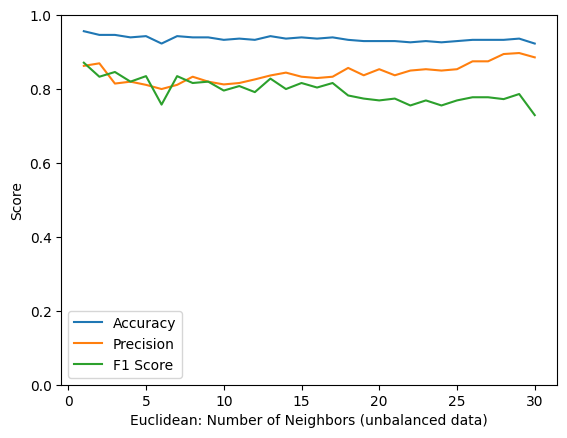

With the Euclidean distance method the best parameter (k): {'n_neighbors': 4}
With the Euclidean distance method the best cross-validation accuracy: 0.9485518102372034
With the Euclidean distance method the best f1_score: 0.82


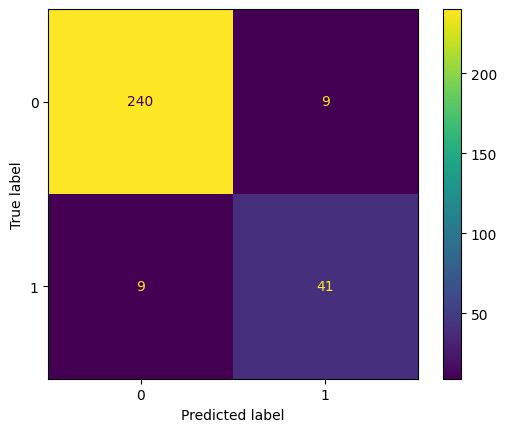

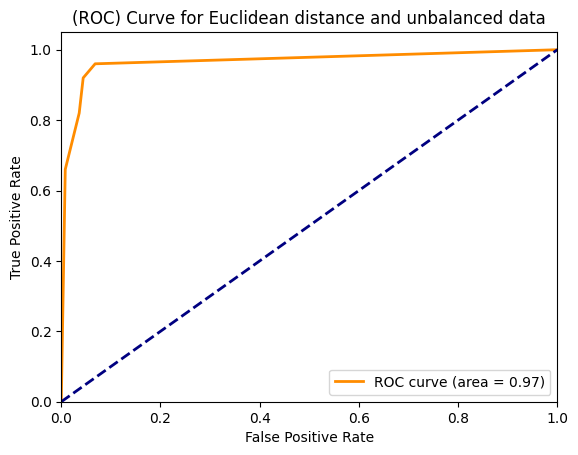

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score


accuracies = []
precisions = []
f1_scores = []

for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'euclidean')
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
plt.ylim(0,1)
plt.xlabel('Euclidean: Number of Neighbors (unbalanced data)')
plt.ylabel('Score')
plt.legend()
plt.show()


param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'euclidean')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter and the corresponding accuracy
print("With the Euclidean distance method the best parameter (k):", grid_search.best_params_)
print("With the Euclidean distance method the best cross-validation accuracy:", grid_search.best_score_)

euclidean_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='euclidean')
euclidean_best_knn.fit(X_train, y_train)

y_pred = euclidean_best_knn.predict(X_test)

print("With the Euclidean distance method the best f1_score:", f1_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


# Predict the probabilities for positive class
y_prob = euclidean_best_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Euclidean distance and unbalanced data')
plt.legend(loc="lower right")
plt.show()

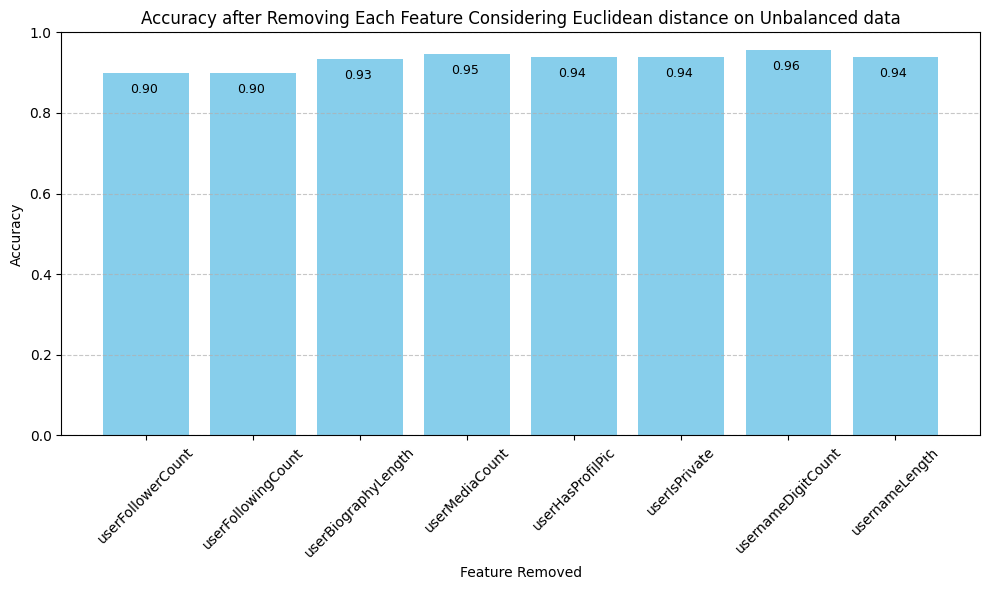

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

features = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 
            'userMediaCount', 'userHasProfilPic', 'userIsPrivate', 
            'usernameDigitCount', 'usernameLength']

target = 'isFake'

accuracies = []

for feature_to_remove in features:
    # Remove the feature from the dataframe
    X = final_df.drop(columns=[feature_to_remove])
    y = final_df[target]
    

    np.random.seed(123)

    X_train_WithDrop,X_test_WithDrop,y_train_WithDrop,y_test_WithDrop = train_test_split(X,y,stratify=y)
    
    param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

    knn = KNeighborsClassifier(metric = 'euclidean')

    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train_WithDrop, y_train_WithDrop)
    
    
    euclidean_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='euclidean')
    euclidean_best_knn.fit(X_train_WithDrop, y_train_WithDrop)

    y_pred_WithDrop = euclidean_best_knn.predict(X_test_WithDrop)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_WithDrop, y_pred_WithDrop)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(features, accuracies, color='skyblue')

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', fontsize=9, color='black')
    
plt.xlabel('Feature Removed')
plt.ylabel('Accuracy')
plt.title('Accuracy after Removing Each Feature Considering Euclidean distance on Unbalanced data')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
    

### Upsampled Data

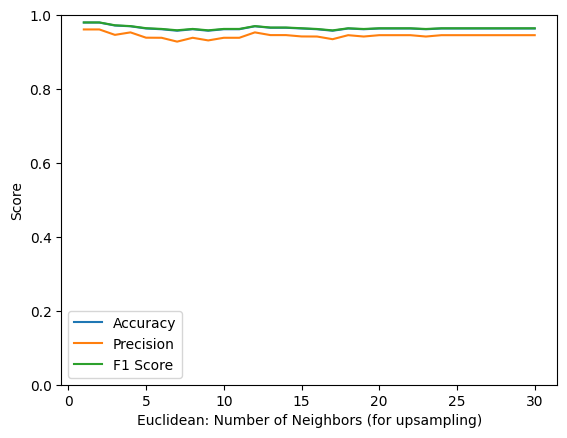

With the euclidean distance method the best parameter (k): {'n_neighbors': 1}
With the euclidean distance method the best cross-validation accuracy: 0.9765190156599551
With the euclidean distance method the best f1_score: 0.9802371541501977
Scores with balance weight:


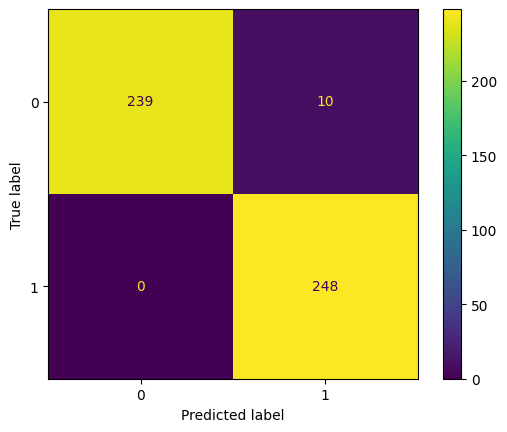

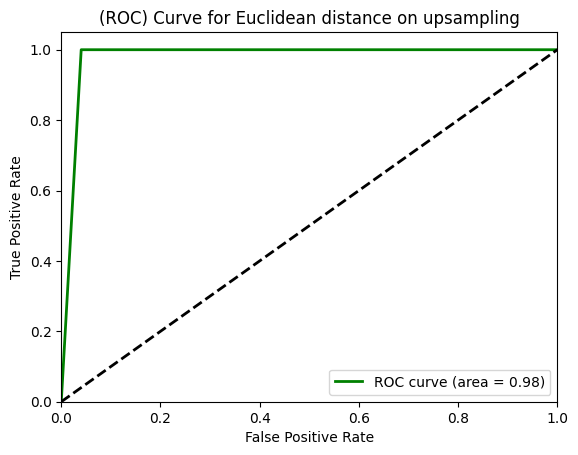

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

accuracies = []
precisions = []
f1_scores = []


for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'euclidean')

    knn.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred_upsampled = knn.predict(X_test_upsampled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_upsampled, y_pred_upsampled)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test_upsampled, y_pred_upsampled)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test_upsampled, y_pred_upsampled)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
# Setting y-axis limits
plt.ylim(0, 1)
plt.xlabel('Euclidean: Number of Neighbors (for upsampling)')
plt.ylabel('Score')
plt.legend()
plt.show()


param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'euclidean')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_upsampled, y_train_upsampled)

# Print the best parameter and the corresponding accuracy
print("With the euclidean distance method the best parameter (k):", grid_search.best_params_)
print("With the euclidean distance method the best cross-validation accuracy:", grid_search.best_score_)


euclidean_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='euclidean')
euclidean_best_knn.fit(X_train_upsampled, y_train_upsampled)

y_pred_upsampled = euclidean_best_knn.predict(X_test_upsampled)

print("With the euclidean distance method the best f1_score:", f1_score(y_test_upsampled, y_pred_upsampled))

ConfusionMatrixDisplay(confusion_matrix(y_test_upsampled, y_pred_upsampled)).plot()

print('Scores with balance weight:')


# Predict the probabilities for positive class
y_prob = euclidean_best_knn.predict_proba(X_test_upsampled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_upsampled, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Euclidean distance on upsampling')
plt.legend(loc="lower right")
plt.show()

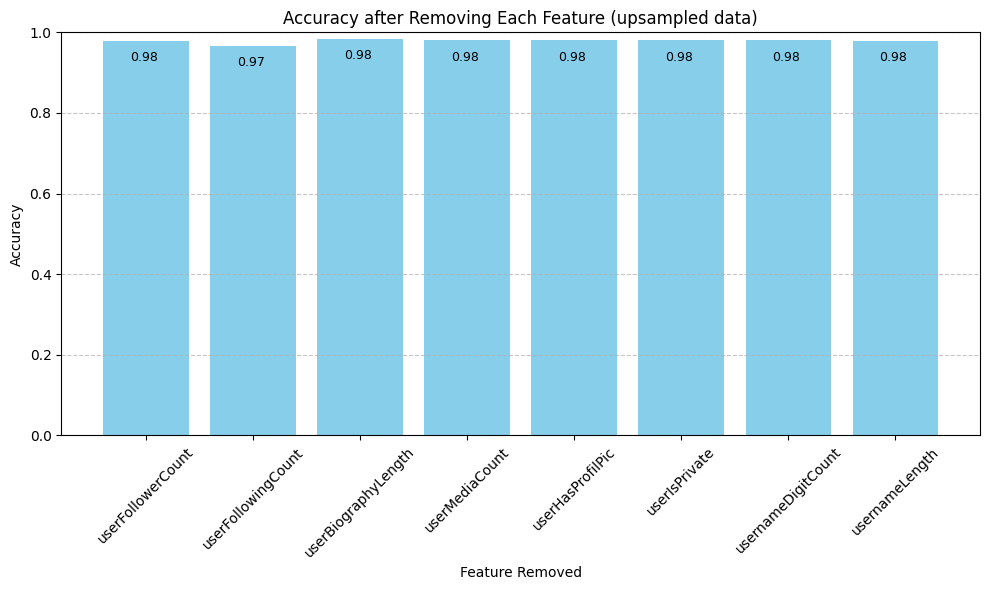

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

features = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 
            'userMediaCount', 'userHasProfilPic', 'userIsPrivate', 
            'usernameDigitCount', 'usernameLength']

target = 'isFake'

accuracies = []

for feature_to_remove in features:
    # Remove the feature from the dataframe
    X_upsampled = final_df_upsampled.drop(columns=[feature_to_remove])
    y_upsampled = final_df_upsampled[target]
    

    np.random.seed(123)

    X_train_WithDrop,X_test_WithDrop,y_train_WithDrop,y_test_WithDrop = train_test_split(X_upsampled,y_upsampled,stratify=y_upsampled)
    
    param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

    knn = KNeighborsClassifier(metric = 'euclidean')

    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train_WithDrop, y_train_WithDrop)
    
    
    euclidean_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='euclidean')
    euclidean_best_knn.fit(X_train_WithDrop, y_train_WithDrop)

    y_pred_WithDrop = euclidean_best_knn.predict(X_test_WithDrop)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_WithDrop, y_pred_WithDrop)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(features, accuracies, color='skyblue')

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', fontsize=9, color='black')
    
plt.xlabel('Feature Removed')
plt.ylabel('Accuracy')
plt.title('Accuracy after Removing Each Feature (upsampled data)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Downsampled Data

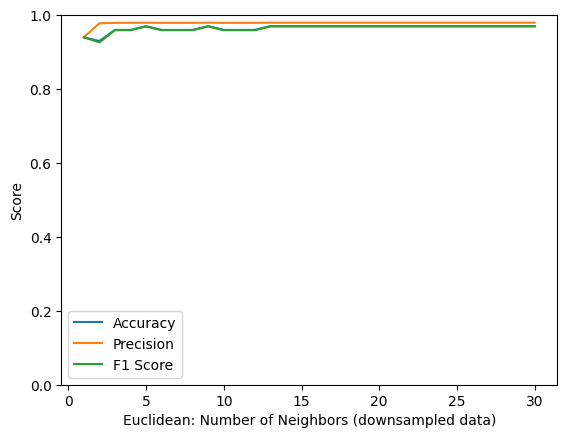

With the Euclidean distance method the best parameter (k): {'n_neighbors': 13}
With the Euclidean distance method the best cross-validation accuracy: 0.9433333333333334
With the Euclidean distance method the best f1_score: 0.9696969696969697
Scores with balance weight:


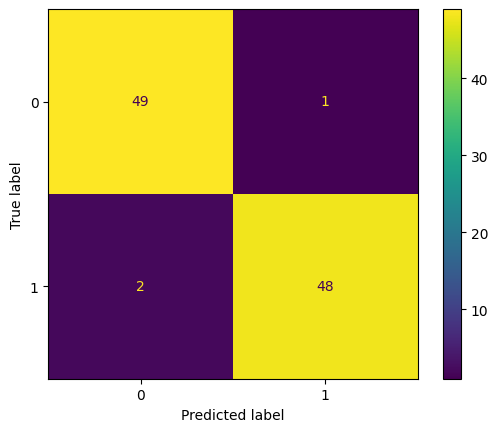

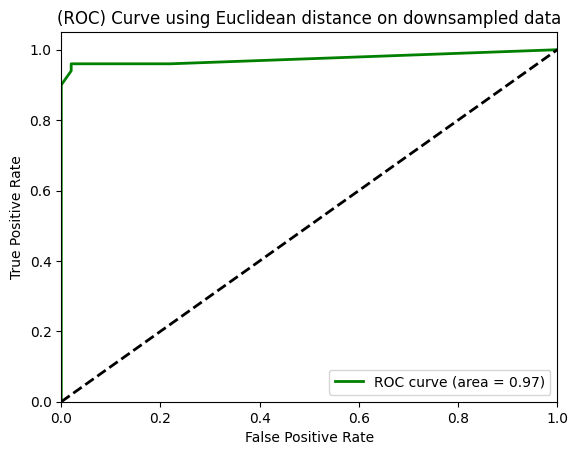

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

accuracies = []
precisions = []
f1_scores = []


for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'euclidean')

    knn.fit(X_train_downsampled, y_train_downsampled)
    
    # Make predictions
    y_pred_downsampled = knn.predict(X_test_downsampled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_downsampled, y_pred_downsampled)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test_downsampled, y_pred_downsampled)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test_downsampled, y_pred_downsampled)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
# Setting y-axis limits
plt.ylim(0, 1)
plt.xlabel('Euclidean: Number of Neighbors (downsampled data)')
plt.ylabel('Score')
plt.legend()
plt.show()


param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'euclidean')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_downsampled, y_train_downsampled)

# Print the best parameter and the corresponding accuracy
print("With the Euclidean distance method the best parameter (k):", grid_search.best_params_)
print("With the Euclidean distance method the best cross-validation accuracy:", grid_search.best_score_)


euclidean_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='euclidean')
euclidean_best_knn.fit(X_train_downsampled, y_train_downsampled)

y_pred_downsampled = euclidean_best_knn.predict(X_test_downsampled)

print("With the Euclidean distance method the best f1_score:", f1_score(y_test_downsampled, y_pred_downsampled))

ConfusionMatrixDisplay(confusion_matrix(y_test_downsampled, y_pred_downsampled)).plot()

print('Scores with balance weight:')


# Predict the probabilities for positive class
y_prob = euclidean_best_knn.predict_proba(X_test_downsampled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_downsampled, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve using Euclidean distance on downsampled data')
plt.legend(loc="lower right")
plt.show()

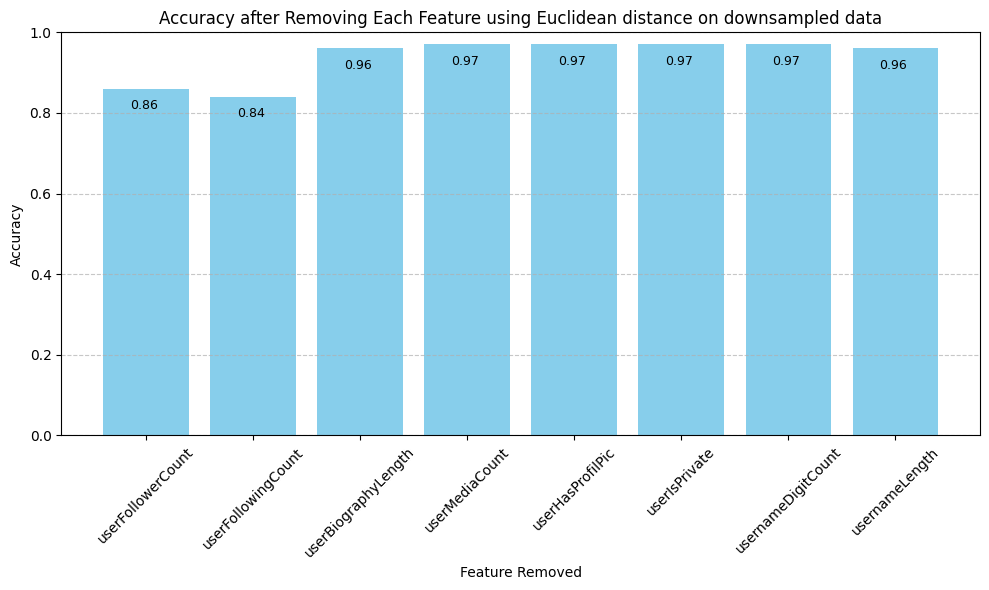

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

features = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 
            'userMediaCount', 'userHasProfilPic', 'userIsPrivate', 
            'usernameDigitCount', 'usernameLength']

target = 'isFake'

accuracies = []

for feature_to_remove in features:
    # Remove the feature from the dataframe
    X_downsampled = final_df_downsampled.drop(columns=[feature_to_remove])
    y_downsampled = final_df_downsampled[target]
    

    np.random.seed(123)

    X_train_WithDrop,X_test_WithDrop,y_train_WithDrop,y_test_WithDrop = train_test_split(X_downsampled,y_downsampled,stratify=y_downsampled)
    
    param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

    knn = KNeighborsClassifier(metric = 'euclidean')

    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train_WithDrop, y_train_WithDrop)
    
    
    euclidean_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='euclidean')
    euclidean_best_knn.fit(X_train_WithDrop, y_train_WithDrop)

    y_pred_WithDrop = euclidean_best_knn.predict(X_test_WithDrop)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_WithDrop, y_pred_WithDrop)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(features, accuracies, color='skyblue')

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', fontsize=9, color='black')
    
plt.xlabel('Feature Removed')
plt.ylabel('Accuracy')
plt.title('Accuracy after Removing Each Feature using Euclidean distance on downsampled data')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
#downsampling the majority class:
from sklearn.model_selection import train_test_split
import numpy as np

samples_to_drop = 994 - 200

# Shuffle the negative samples randomly
real_df = real_df.sample(frac=1, random_state=123)
    
# Drop the excess samples from the shuffled negative samples
real_df_downsampled = real_df.iloc[samples_to_drop:]

fake_df_downsampled = fake_df

final_df_downsampled=pd.concat([real_df_downsampled,fake_df_downsampled],ignore_index=True)

X_downsampled=final_df_downsampled.drop('isFake',axis=1)
y_downsampled=final_df_downsampled['isFake']


#display the number of samples of each class
print(fake_df_downsampled.shape)
print(real_df_downsampled.shape)


np.random.seed(123)

X_train_downsampled,X_test_downsampled,y_train_downsampled,y_test_downsampled=train_test_split(X_downsampled,y_downsampled,stratify=y_downsampled)
y_train_downsampled.value_counts()

(200, 9)
(200, 9)


isFake
0    150
1    150
Name: count, dtype: int64

## Cosine distance

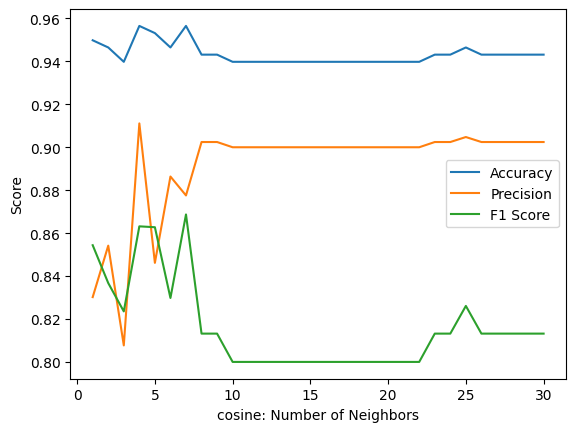

With the cosine distance method the best parameter (k): {'n_neighbors': 12}
With the cosine distance method the best cross-validation accuracy: 0.9597877652933832
With the cosine distance method the best f1_score: 0.7999999999999999


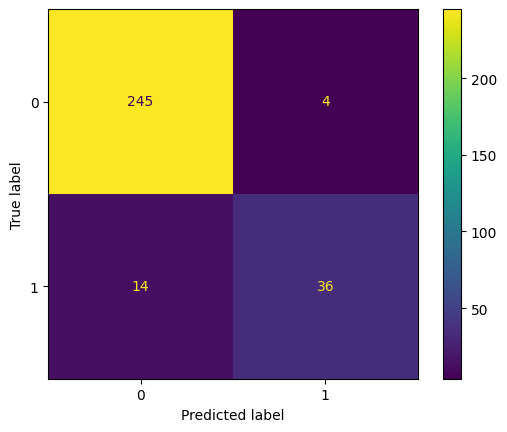

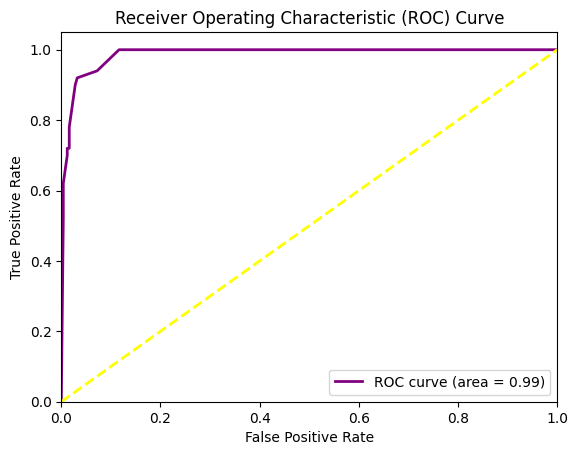

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score


accuracies = []
precisions = []
f1_scores = []

for n_neighbors in range(1, 31):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'cosine')
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)  
    precisions.append(precision)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)  
    f1_scores.append(f1)
    
plt.plot(range(1, 31), accuracies, label='Accuracy')
plt.plot(range(1, 31), precisions, label='Precision')
plt.plot(range(1, 31), f1_scores, label='F1 Score')
plt.xlabel('cosine: Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()

param_grid = {'n_neighbors': range(1, 31)}  # try k values from 1 to 30

knn = KNeighborsClassifier(metric = 'cosine')

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter and the corresponding accuracy
print("With the cosine distance method the best parameter (k):", grid_search.best_params_)
print("With the cosine distance method the best cross-validation accuracy:", grid_search.best_score_)

cosine_best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'], metric='cosine')
cosine_best_knn.fit(X_train, y_train)

y_pred = cosine_best_knn.predict(X_test)

print("With the cosine distance method the best f1_score:", f1_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Predict the probabilities for positive class
y_prob = cosine_best_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### According to the above figures since downscaling performed better than the other sampling methods coupled with the fact that downscaling is generally more reliable  especially when taking into consideration the type of models we are using (Knn, RF)


### We'll stick to downscaling and use gridsearch to get best parameters for  the random forest classifier and Knn

In [145]:
param_grid_knn={'n_neighbors': list(range(1,20)),'metric':['euclidean','manhattan','cityblock','haversine'],'weights':['uniform','distance']}
param_grid_rf={'n_estimators':list(range(50,120,4)), 'criterion':['entropy', 'log_loss', 'gini']}
Knn_cv=GridSearchCV(KNeighborsClassifier(),param_grid_knn,cv=10, scoring='accuracy')
Rf_cv=GridSearchCV(RandomForestClassifier(),param_grid_rf,cv=10, scoring='accuracy')

In [178]:
Knn_cv.fit(X_train_downsampled, y_train_downsampled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
380 fits failed out of a total of 1520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 228, in fit
    return s

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cityblock',
                                    'haversine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



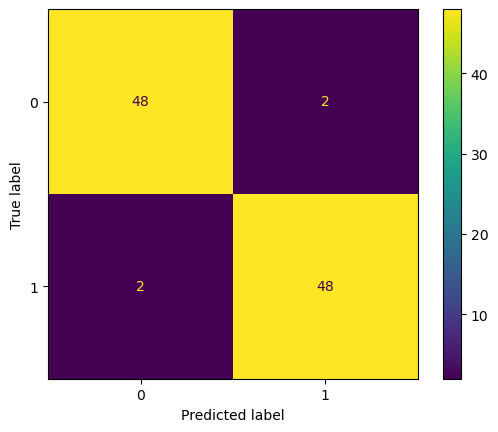

In [180]:
print(Knn_cv.best_params_)
ConfusionMatrixDisplay(confusion_matrix(Knn_cv.predict(X_test_downsampled)
,y_test_downsampled)).plot()
print(classification_report(Knn_cv.predict(X_test_downsampled)
,y_test_downsampled))

In [146]:
Rf_cv.fit(X_train_downsampled, y_train_downsampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini'],
                         'n_estimators': [50, 54, 58, 62, 66, 70, 74, 78, 82,
                                          86, 90, 94, 98, 102, 106, 110, 114,
                                          118]},
             scoring='accuracy')

{'criterion': 'log_loss', 'n_estimators': 118}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.96      0.97        51

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



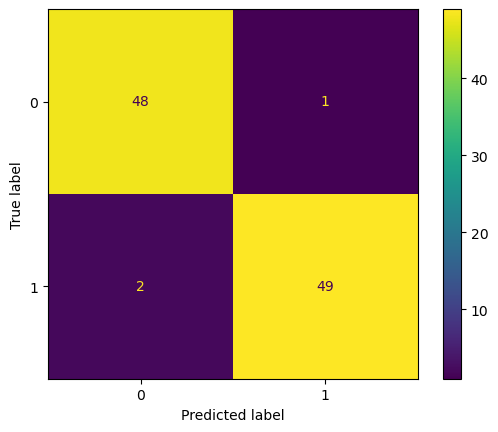

In [174]:
print(Rf_cv.best_params_)
ConfusionMatrixDisplay(confusion_matrix(Rf_cv.predict(X_test_downsampled)
,y_test_downsampled)).plot()
print(classification_report(Rf_cv.predict(X_test_downsampled)
,y_test_downsampled))

## to predict whether a follower is fake or not we'll use the Instaloader Library to scrape for data then apply the model

In [93]:
import instaloader
import pandas as pd
 
bot = instaloader.Instaloader()
bot.login('hadi.mhanna.5','***') # removed my password, if you want to run again put your own account


profile = instaloader.Profile.from_username(bot.context, 'hasanbazzi_')
print("Username: ", profile.username)
print("User ID: ", profile.userid)
print("Number of Posts: ", profile.mediacount)
print("Followers Count: ", profile.followers)
print("Following Count: ", profile.followees)
profile.profile_pic_url
print("Bio: ", profile.biography)
print("External URL: ", profile.external_url)
follow_list = []
count=0
for followee in profile.get_followers():
    follow_list.append(followee.username)
    file = open("prada_followers.txt","a+")
    file.write(follow_list[count])
    file.write("\n")
    file.close()
    print(follow_list[count])
    count=count+1


Username:  hasanbazzi_
User ID:  37049398598
Number of Posts:  0
Followers Count:  164
Following Count:  269
Bio:  LAU | Mechatronics Engineer
26/12/2023 💔🥀
External URL:  None
mohammad._.shaito
ahmadsaadeddine
youssef.bazzi45
sara_mosawie
hala.i.metwally
live.love.bintjbeil
zainabzahwi
sirine._.009
ramihjeij
xsaabbb
marilysechalhoub
ghazal._.al81
nour.nasser.505
alisouweidan
hadi_hjeze
abbas_t17
alisquared7
hussein_ftounii
ali._.dor
hsen.ali.ahmad1.7
mariam.i.hs
lynn_salameh
valentinazablith
mohammad__saifan
lana_kassih
hsen_faytarouni
fatenmawla_
ayajouni1
farahalnasar
moh_bash
tina_mershid__
a.ghanems
mansourrefaat
mohamad.alhadi
alialhadiamro
_mhmdjaber_
r.a.s.h.i.d_farhat
yaidibi
raedmerhi_
mohamad.ramadan04
youssefkourani_
mhmd_baher8
jana_rammal__
reine_assi_
egy_fpl
jtashkandy
jul.raad
nivinawada
hussien_swn
shadiixche
srour1486
saydhashem245
rayan_bazzi6
bob_ghannam
the_moe_hammoud
m.mahdishoeab
adam_hmayed
hussain__hussainy
ragheb_mokdad
gaelleetohmee
hassan_alhakim300
ali_ba

In [94]:
follow_list

['mohammad._.shaito',
 'ahmadsaadeddine',
 'youssef.bazzi45',
 'sara_mosawie',
 'hala.i.metwally',
 'live.love.bintjbeil',
 'zainabzahwi',
 'sirine._.009',
 'ramihjeij',
 'xsaabbb',
 'marilysechalhoub',
 'ghazal._.al81',
 'nour.nasser.505',
 'alisouweidan',
 'hadi_hjeze',
 'abbas_t17',
 'alisquared7',
 'hussein_ftounii',
 'ali._.dor',
 'hsen.ali.ahmad1.7',
 'mariam.i.hs',
 'lynn_salameh',
 'valentinazablith',
 'mohammad__saifan',
 'lana_kassih',
 'hsen_faytarouni',
 'fatenmawla_',
 'ayajouni1',
 'farahalnasar',
 'moh_bash',
 'tina_mershid__',
 'a.ghanems',
 'mansourrefaat',
 'mohamad.alhadi',
 'alialhadiamro',
 '_mhmdjaber_',
 'r.a.s.h.i.d_farhat',
 'yaidibi',
 'raedmerhi_',
 'mohamad.ramadan04',
 'youssefkourani_',
 'mhmd_baher8',
 'jana_rammal__',
 'reine_assi_',
 'egy_fpl',
 'jtashkandy',
 'jul.raad',
 'nivinawada',
 'hussien_swn',
 'shadiixche',
 'srour1486',
 'saydhashem245',
 'rayan_bazzi6',
 'bob_ghannam',
 'the_moe_hammoud',
 'm.mahdishoeab',
 'adam_hmayed',
 'hussain__hussainy

In [97]:
len(follow_list)

165

### After getting the follower names we'll get data on the followers with delays to not get banned by Instagram

In [100]:
import time
followers_data=[]
for username in follow_list:
    profile = instaloader.Profile.from_username(bot.context,username)
    followers=profile.followers
    followees=profile.followees
    userBiographyLength=len(profile.biography)
    MediaCount=profile.mediacount
    usernameDigitCount=len(username)
    lambda_func = lambda x: 0 if len(x) == 0 else 1
    hasProfile=lambda_func(profile.profile_pic_url)
    isPrivatefunc= lambda x: 0 if x==False else 1
    userIsPrivate= isPrivatefunc(profile.is_private)
    followers_data.append({'userFollowerCount':followers,'userFollowingCount':followees,'userBiograph   yLength':userBiographyLength,'userMediaCount':MediaCount,'userHasProfilPic':hasProfile,'userIsPrivate':userIsPrivate,'usernameDigitCount':usernameDigitCount,'usernameLength':len(username)})
    time.sleep(2)
    print(username)

mohammad._.shaito
ahmadsaadeddine
youssef.bazzi45
sara_mosawie
hala.i.metwally
live.love.bintjbeil
zainabzahwi
sirine._.009
ramihjeij
xsaabbb
marilysechalhoub
ghazal._.al81
nour.nasser.505
alisouweidan
hadi_hjeze
abbas_t17
alisquared7
hussein_ftounii
ali._.dor
hsen.ali.ahmad1.7
mariam.i.hs
lynn_salameh
valentinazablith
mohammad__saifan
lana_kassih
hsen_faytarouni
fatenmawla_
ayajouni1
farahalnasar
moh_bash
tina_mershid__
a.ghanems
mansourrefaat
mohamad.alhadi
alialhadiamro
_mhmdjaber_
r.a.s.h.i.d_farhat
yaidibi
raedmerhi_
mohamad.ramadan04
youssefkourani_
mhmd_baher8
jana_rammal__
reine_assi_
egy_fpl
jtashkandy
jul.raad
nivinawada
hussien_swn
shadiixche
srour1486
saydhashem245
rayan_bazzi6
bob_ghannam
the_moe_hammoud


JSON Query to api/v1/users/web_profile_info/?username=m.mahdishoeab: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')) [retrying; skip with ^C]


m.mahdishoeab
adam_hmayed
hussain__hussainy
ragheb_mokdad
gaelleetohmee
hassan_alhakim300
ali_bakri1
ali_a_fakih
wissamrasamny
jad4chaar
jawad.bazzi
abbass_abdallah99
rima.elhassan20
mostafa.r.rammal
louaywehbe_
a.tahini
nadim_fleyti
_hadi.mortada_
mazenawwad_
abbas_.tfaily
hussein.sharafeldine
_2tbz
mohamad.nasser._
mohammad_rehawy
halahala534
yarajabb
hsen_mokdad
bahous.dorms2
mohamad_anas_bakri
nassimyassine
hadiii_49
hasanismaa
karimghorabi
aliassi_7
aliawada.0
housseinkansoo
hadi.mhanna.5

Too many queries in the last time. Need to wait 11 minutes, until 18:11.


JSON Query to api/v1/users/web_profile_info/?username=yehyakarameldine: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')) [retrying; skip with ^C]


yehyakarameldine
mhmdayassine
mohamad.hakim1
soufan4319
jadelghazawi1
mahdi.mortada.1
karenhajjhasan
ramichamass
hadi_bazzi_07
mahmoud_srour37
fatimahshm03


JSON Query to api/v1/users/web_profile_info/?username=_mhmadkamal_: HTTPSConnectionPool(host='i.instagram.com', port=443): Read timed out. (read timeout=300.0) [retrying; skip with ^C]


_mhmadkamal_
ali.jaffall
a.jebahi
nour.hachem.562
adonishdaify
hoda_ibrahim_bazzi
rababkrayem_
mahdi_skaiky
ramyy_hh
hamzahmuswi
hussein_kobiessi
malak_ahmad
iaiw.10
hydrxn_
mustafa_abushaz
ali.h.kachakeche
abed_moustafa1
bassem_mokdad
abo_jeek_301
mhmd_kobiessy
hisham_nasserdine
hssn_ztrr
_zahraaswd_
ali_alrida_dbouk
nouryucef
ahmadnajde_
slaimen.___.ezzddein
adammnazzal
karimm_khalil
aliikheshenn
mhmd._.berro
mohalawieh
deletd_8282828292928
assilghndour
alihammouds
zaiter__hassan
nouurezzeddinee
rashidrashid693
rida.shbib
mustafaaboushaz
mariam.ztr
mhmd_fakih_
jawad.904
ali_hlw00
alii_tormos
malakmzhr_
jawadyounes_
hsen_mokaddem
ali_nassereddeen
h.sharif17
aliakbarfakih
waeldgheim
carlosawada7
hasnrmdn
user12210253
zain_awada1
najiz_saleh
mohamed_sadekkkkk
m.j.youssef
aliikheshen
thevutbol
aliimansourr_


In [102]:
followers_data # converted to this format to be able to create a dataframe to predict

[{'userFollowerCount': 411,
  'userFollowingCount': 545,
  'userBiograph   yLength': 1,
  'userMediaCount': 0,
  'userHasProfilPic': 1,
  'userIsPrivate': 1,
  'usernameDigitCount': 17,
  'usernameLength': 17},
 {'userFollowerCount': 956,
  'userFollowingCount': 996,
  'userBiograph   yLength': 3,
  'userMediaCount': 8,
  'userHasProfilPic': 1,
  'userIsPrivate': 1,
  'usernameDigitCount': 15,
  'usernameLength': 15},
 {'userFollowerCount': 568,
  'userFollowingCount': 480,
  'userBiograph   yLength': 24,
  'userMediaCount': 17,
  'userHasProfilPic': 1,
  'userIsPrivate': 1,
  'usernameDigitCount': 15,
  'usernameLength': 15},
 {'userFollowerCount': 163,
  'userFollowingCount': 96,
  'userBiograph   yLength': 56,
  'userMediaCount': 7,
  'userHasProfilPic': 1,
  'userIsPrivate': 1,
  'usernameDigitCount': 12,
  'usernameLength': 12},
 {'userFollowerCount': 541,
  'userFollowingCount': 1325,
  'userBiograph   yLength': 33,
  'userMediaCount': 10,
  'userHasProfilPic': 1,
  'userIsPrivat

In [104]:
df_to_predict=pd.DataFrame(followers_data)

In [172]:
df_to_predict

,userFollowerCount,userFollowingCount,userBiograph yLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength
0,411,545,1,0,1,1,17,17
1,956,996,3,8,1,0,15,15
2,568,480,24,17,1,0,15,15
3,163,96,56,7,1,0,12,12
4,541,1325,33,10,1,0,15,15
...,...,...,...,...,...,...,...,...
160,302,329,124,30,1,0,17,17
161,147,566,27,0,1,1,11,11
162,442,445,2,1,1,0,11,11
163,802,3374,76,51,1,0,9,9


In [129]:
pd.DataFrame(Rf_cv.predict(df_to_predict)).value_counts()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0    165
Name: count, dtype: int64

### According to the above prediction, Hassan Bazzi has no fake followers (contact us to check percentage of fake followers) 